<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Control-Sample" data-toc-modified-id="Load-Control-Sample-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Control Sample</a></span></li><li><span><a href="#Run-ESASky" data-toc-modified-id="Run-ESASky-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Run ESASky</a></span></li><li><span><a href="#Construct-Data-Sample" data-toc-modified-id="Construct-Data-Sample-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Construct Data Sample</a></span></li><li><span><a href="#Visual-Inspection" data-toc-modified-id="Visual-Inspection-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Visual Inspection</a></span></li><li><span><a href="#Clustering-Analysis" data-toc-modified-id="Clustering-Analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Clustering Analysis</a></span></li><li><span><a href="#Compare-to-Control" data-toc-modified-id="Compare-to-Control-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Compare to Control</a></span></li><li><span><a href="#Save-HDBSCAN-slected-Output" data-toc-modified-id="Save-HDBSCAN-slected-Output-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Save HDBSCAN slected Output</a></span></li></ul></div>

In [1]:
# Python Basics ========================
import warnings, itertools, sys, os
warnings.filterwarnings('ignore', category=UserWarning)
sys.path.append('../library/')

# Custom ===============================
from lib_utils       import LibUtils       as Utils
from lib_gaia_query  import LibGaiaQuery   as GaiaQuery
from lib_interactive import LibInteractive as Interactive
from lib_cluster     import LibCluster     as Cluster
from lib_plotters    import LibPlotters    as Plotters
from lib_compare     import LibCompare     as Compare

# PyEsasKy =============================
from pyesasky.pyesasky import ESASkyWidget

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [2]:
# SetUp Analysis Steps =================================
step_1 = True # Load Control Sample
step_2 = True # ESASky Plot
step_3 = True # Interactive/Dynamical Gaia Data exploration
step_4 = True # Clustering

# Load Control Sample

Sample Control loaded. N_elements (rows) = 147

Checking catalogue columns (ra, dec, parallax, pmra, phot_g_mean_mag, etc) - OK
Adding new columns to Gaia DR2 dataset: Absolute Magnitudes
Adding new columns to Gaia DR2 dataset: Magnitude Errors
Adding new columns to Gaia DR2 dataset: Galactic Coordinates (l & b)
Adding new columns to Gaia DR2 dataset: Proper Motion Modulus

Showing Sample Control first 5 rows:


col2mass,source_id,ra,dec,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,phot_g_mean_flux_over_error,phot_bp_mean_flux_over_error,phot_rp_mean_flux_over_error,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_chi2_al,astrometric_n_good_obs_al,visibility_periods_used,radial_velocity,a_g_val,phot_bp_rp_excess_factor,bp_rp,unit_weight_e,ruwe,distance,galactic_l,galactic_b,X_gal,Y_gal,Z_gal,phot_g_mean_mag_abs,phot_bp_mean_mag_abs,phot_rp_mean_mag_abs,phot_g_mean_mag_err,phot_bp_mean_mag_err,phot_rp_mean_mag_err,l,b,pm_mod
,,deg,deg,mas,mas,mas / yr,mas / yr,mas / yr,mas / yr,mag,mag,mag,,,,mas,,,,,km / s,mag,,mag,,,pc,deg,deg,pc,pc,pc,mag,mag,mag,mag,mag,mag,deg,deg,
bytes17,int64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float64,float64,float32,int32,int16,float64,float32,float32,float32,float64,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float64,float64,float64
03430679+3148204,216575791780899200,55.77832585931487,31.805676998022935,3.368292212211576,0.18569575746121944,4.153055103839073,0.24327365471569765,-7.238032874307061,0.1874717775215194,16.336063,18.711496,14.907626,627.83307,41.59013,198.40709,0.6368655649321211,17.254083533615077,468.16776,143,9,--,--,1.6700338,3.8038702,1.8418794652984396,1.078421,296.8863557545719,160.4813425089641,-18.274276051194594,-265.71251048328895,94.19112160624377,-93.09351543719953,8.973112190843308,11.348545158982956,7.544674957872116,0.0015927801,0.024044167,0.0050401427,160.48134,-18.27428,8.344877865198118
03432622+3159286,216673162984386944,55.859323289998294,31.99127822034385,2.632751869978748,0.2504633438776319,4.608158705333078,0.4623583068436142,-6.940869193945712,0.2801396522260879,18.188923,20.33305,16.75615,508.76843,14.258361,157.91954,0.44099928095471314,1.1669417914847346,208.95879,160,9,--,--,1.6959127,3.5769005,1.1610862156055872,0.96449953,379.8307054314511,160.41234437231137,-18.087516133532343,-340.16607035974886,121.04511399062618,-117.9257806569729,10.290972531622979,12.435099423712822,8.858198941535088,0.0019655307,0.07013429,0.006332339,160.41234,-18.08752,8.331313931247678
03432774+3208314,216692099496268288,55.86564895264847,32.142068755211675,3.315366603457813,0.20983146461589036,4.584408968543563,0.43174948098974925,-7.2091046805227315,0.24425233421779075,17.565023,19.63398,16.151264,601.43933,24.294651,176.66731,0.4813116505776564,2.5302365944745504,154.82939,114,8,--,--,1.6755339,3.4827156,1.1918276439315283,0.94958436,301.6257686124468,160.31545807252306,-17.968022951474588,-270.1482255416466,96.64484815680675,-93.0473742375179,10.167681214234388,12.236637589356459,8.753921982667006,0.0016626781,0.041161325,0.0056603565,160.31546,-17.96802,8.543301228775526
03433205+3206172,216685949103101824,55.88362722579706,32.104790681581335,2.9996222049239414,0.05954141609718637,3.555695459980017,0.1183264543616157,-6.921575941462564,0.06722023993853171,14.828465,15.982068,13.762056,661.0584,126.30815,243.22202,0.16797337382506813,3.515182295917742,212.73567,141,8,--,--,1.3909668,2.2200117,1.2506929608546613,1.0847275,333.375315850936,160.35279646014772,-17.98700018932103,-298.6218542737961,106.61175690005699,-102.94669814750816,7.213798260914656,8.367400861012312,6.147389149891707,0.0015127256,0.007917145,0.0041114697,160.35280,-17.98700,7.78146411143532
03433365+3201451,216673678380015232,55.89025861343185,32.029207864923364,3.2290728529141717,0.1792326043703605,4.7918714236640385,0.325847169733034,-7.534572612363947,0.20241032929788338,17.243881,--,--,416.147,--,--,0.4847208181201398,4.402847399223395,295.69818,156,9,--,--,--,--,1.399380613109474,1.3609223,309.68641636484625,160.40809811104918,-18.041576351770885,-277.41197326279234,98.73778192926129,-95.9120638451407,9.78927044302494,--,--,0.002402997,--,--,160.40810,-18.04158,8.929267393908242


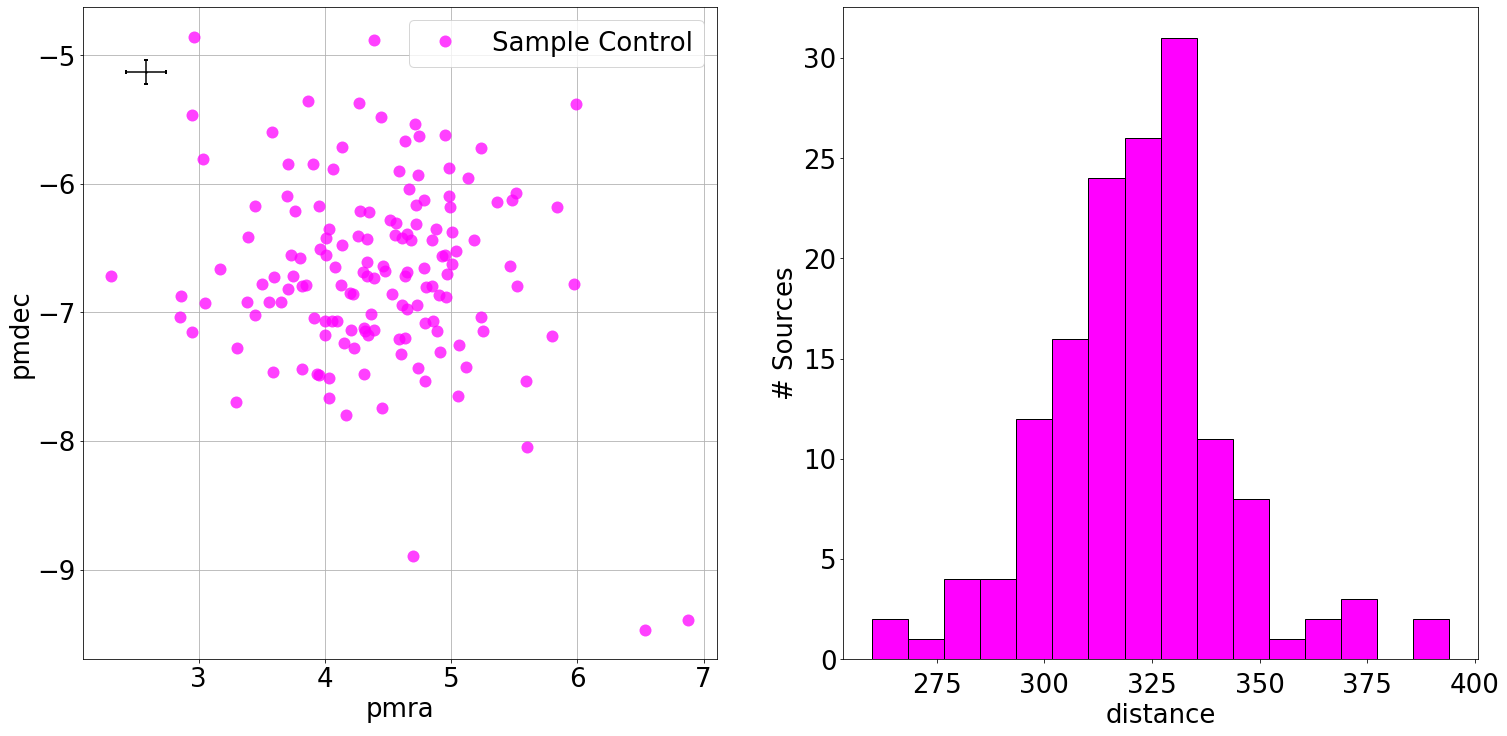

In [3]:
# Load Control Sample ==================================
if step_1:
    control = Utils(color = 'magenta', label = 'Sample Control')
    control.read_catalogue('../control_samples/sample_control_IC_348.vot')
    print()
    print(f'Showing {control.label} first 5 rows:')
    display(control.cat[0:5])

    # Examine Velocity & Histograms ====================
    figures  = Plotters()
    figures.load_gaia_cat(control.cat)
    figures.plot_2d_and_hist(col_hist = 'distance', label = control.label,
                             color_2d = control.color, color_hist = control.color )    

# Run ESASky

In [4]:
# Run ESASKY ===========================================
if step_2:
    esasky = ESASkyWidget()
    display(esasky)

ESASkyWidget(layout=Layout(align_self='stretch', height='400px'))

In [5]:
# Show Control Sample in ESASky ========================
if step_1 and step_2:
    figures_0  = Plotters()
    figures_0.load_gaia_cat(control.cat)
    figures_0.send_to_ESASky(esasky, background='WISE', color=control.color, catalogueName = control.label)

hipsURL http://cdn.skies.esac.esa.int/AllWISEColor/
imgFormat jpeg


# Construct Data Sample

In [6]:
# Create Gaia Sample ===================================
sample_queried = GaiaQuery()
if step_1:
    control.print_cone_properties()
    ra  = control.ADQL_pars['ra'].value
    dec = control.ADQL_pars['dec'].value
    sample_queried.set_cone_search_pars(ra = ra, dec = dec)
else:
    sample_queried.set_cone_search_pars()
sample_queried.run_cone_search(quality_par_SN  = '10', quality_par_vis = '7',quality_par_ruwe = '1.40')

print()
sample_gaia = Utils(color = 'grey', label = sample_queried.sample_name)
sample_gaia.read_catalogue(sample_queried.cat, save_sample = True, print_vrad = True)

print('Showing first 5 rows of Analysis Sample')
display(sample_gaia.cat[0:5])

Sample Control on-Sky sample properties:
* Average R.A.         56.13, deg
* Average Dec.         32.17, deg
* Radius on-sky         0.36, deg
* Parallax min          2.51, mas
* Parallax max          3.92, mas
Introduce sample name (e.g. IC_348_test): test
Preparing Cone-Search ADQL query. Introduce radius [decimal degree]: 1.2
Preparing Cone-Search ADQL query. Introduce min-Parallax [mas]: 2.4
Preparing Cone-Search ADQL query. Introduce max-Parallax [mas]: 4.1

RUNNING ADQL ASYNCRHRONOUS QUERY =========================================================
Launched query: 'SELECT gaia.source_id, gaia.ra, gaia.dec, gaia.parallax, gaia.parallax_error, gaia.pmra, gaia.pmra_error, gaia.pmdec, gaia.pmdec_error, gaia.phot_g_mean_mag, gaia.phot_bp_mean_mag, gaia.phot_rp_mean_mag, gaia.phot_g_mean_flux_over_error, gaia.phot_bp_mean_flux_over_error, gaia.phot_rp_mean_flux_over_error, gaia.l, gaia.b, gaia.visibility_periods_used, gaia.radial_velocity ,sqrt(gaia.astrometric_chi2_al/(gaia.astrometric_

source_id,ra,dec,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,phot_g_mean_flux_over_error,phot_bp_mean_flux_over_error,phot_rp_mean_flux_over_error,l,b,visibility_periods_used,radial_velocity,unit_weight_e,ruwe,distance,phot_g_mean_mag_abs,phot_bp_mean_mag_abs,phot_rp_mean_mag_abs,phot_g_mean_mag_err,phot_bp_mean_mag_err,phot_rp_mean_mag_err,X_gal,Y_gal,Z_gal,pm_mod
,deg,deg,mas,mas,mas / yr,mas / yr,mas / yr,mas / yr,mag,mag,mag,,,,deg,deg,,km / s,,,pc,mag,mag,mag,mag,mag,mag,pc,pc,pc,
int64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float64,float64,int16,float64,float64,float32,float64,float64,float64,float64,float32,float32,float32,float64,float64,float64,float64
216403099737497216,56.390825603576445,31.333914206170537,2.696193297927105,0.07917044231652512,3.175267797475226,0.12482863925138177,-5.07733380712027,0.08143771024102295,15.44325,16.783953,14.296078,801.7088,123.525955,216.32027,161.22170352089702,-18.301000286377647,10,--,1.3870029652621045,1.102411,370.9,7.597004826513695,8.937707837072777,6.449832852331566,0.0012473357,0.008095465,0.0046227756,-333.3898840956781,113.35426949915181,-116.46384237621503,5.988459248805955
216558298378625920,55.25861650210676,31.647406880598645,3.224076805430021,0.2654580123877,-0.821968213476409,0.3834020346543497,-16.79078933117509,0.2773816811405739,17.864826,19.706486,16.498363,526.03845,15.833649,223.8,160.2277261302588,-18.677512049550884,9,--,1.3102413966004456,1.1112864,310.2,10.40685309848142,12.248512644379858,9.040390390961889,0.0019010017,0.063156635,0.0044682752,-276.5087495344675,99.39815231095002,-99.32802964161567,16.810896410003508
216389763861636352,56.446464839546096,31.219103331613546,3.9562233159816,0.19568389463755947,30.84567951473386,0.3304100273438955,-23.64134242274264,0.21218613434354722,17.934797,19.605299,16.637209,786.02844,27.178444,170.55228,161.3380805007045,-18.35790973458561,10,--,1.1711001243506194,1.0216268,252.8,10.921201277650978,12.591702986635353,9.623612929262306,0.0012722187,0.036793865,0.0058633047,-227.28912937252412,76.76479323256497,-79.60923066067359,38.86346634404917
216433301947549952,57.06975817287067,31.75431113129947,2.637779247604118,0.1513710311322407,18.27541004400568,0.27625222169517266,-3.742804990590623,0.1663226218357889,16.958202,18.330004,15.783369,1223.1678,61.9091,311.22287,161.39824901023272,-17.605791980118738,10,--,1.1938366998442582,1.059503,379.1,9.064394597947437,10.43619597429021,7.889561300217945,0.0008175493,0.016152713,0.0032131316,-342.4720770928839,115.26623913915687,-114.6670050911107,18.654736703425588
216537102715523840,55.4005829876858,31.396778652733648,3.179170366002343,0.31266743423506954,-11.421990645525202,0.6094613448908595,14.336137592055179,0.34230064019060374,18.464634,20.103952,17.197231,413.24603,10.562215,116.928696,160.49442765688707,-18.794425860909964,8,--,1.1008992206400032,0.9808694,314.5,10.976202949629757,12.61552141581628,9.708800300703976,0.002419866,0.09467711,0.008552221,-280.68633613576566,99.42696730801607,-101.33889029932881,18.329940298997236


In [7]:
# Show output in ESASky ================================
if step_2:
    figures  = Plotters()
    figures.load_gaia_cat(sample_gaia.cat)
    figures.send_to_ESASky(esasky, background='WISE', color='white', radius = sample_gaia.ADQL_pars['radius'].value, catalogueName = 'Analysis Sample')

hipsURL http://cdn.skies.esac.esa.int/AllWISEColor/
imgFormat jpeg


# Visual Inspection

In [8]:
# Examine astrometry ===================================
if step_3:
    i_figures = Interactive()
    i_figures.load_gaia_cat(sample_gaia.cat)
    if step_1:
            i_figures.load_control_obj(control)
    i_figures.explore_and_select(opacity = 0.5, border_width = 1, color_def = 'black', color_high = 'cyan')
    display(i_figures.dashboard)

Exporting Astropy Table to Pandas
Exporting Control Table to Pandas


    'data': [{'marker': {'cmax': 1.5,
                         'c…

In [9]:
# Show 3D distribution =================================
if step_2 and step_3:
    if hasattr(i_figures, 'cat_subsamp'):
        print('Plotting Subsample in ESASky')
        figures.add_catalogue_to_ESASky(esasky, i_figures.cat_subsamp, color='cyan', catalogueName='SubSamp', radius = sample_gaia.ADQL_pars['radius'].value)

if step_3:
    i_figures.show_3D_space(width = 1200, height=700, size = 5, color_def = 'black')
    display(i_figures.fig_3D)

FigureWidget({
    'data': [{'marker': {'cmax': 1.5,
                         'cmin': -0.5,
                  …

# Clustering Analysis

Introduce scaler option (standard (default), robust, minmax): 
Scaled data saved as: test_scl_standard.vot


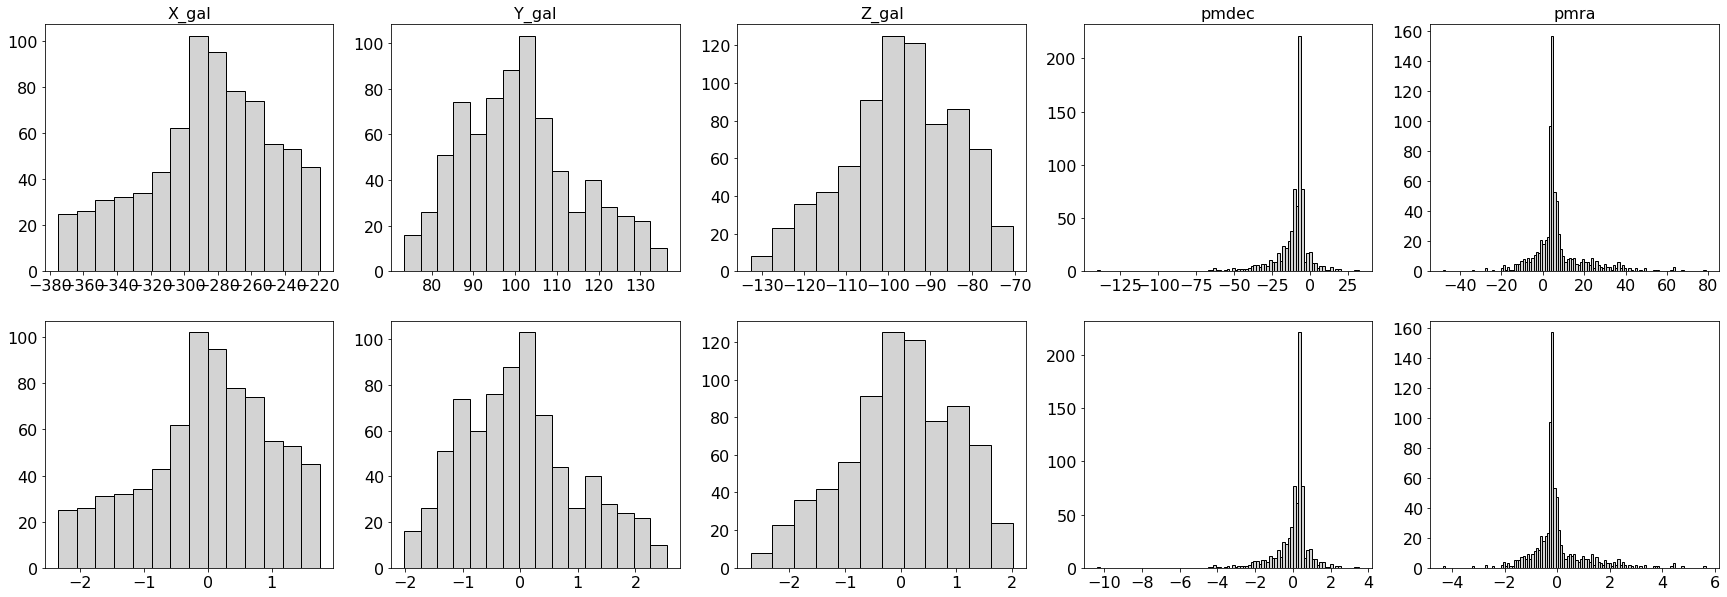

PDF saved as: test_scl_standard.pdf


In [10]:
# Scale before clustering ==============================
if step_4:
    data_clustering = Cluster()
    data_clustering.read_data_obj(sample_gaia, scl_features = ['X_gal', 'Y_gal', 'Z_gal', 'pmdec', 'pmra'])


Running HDBSCAN for mCls = 10:70 in steps of 1

Insert Probability-membership threshold (default = 70%): 80
Probability thresold set to:   80%
Insert min_samples value (default = None; 1, 2, 3...): 1
minSamples set to:               1
mCls = 10; clusters = 3; N_members = [358, 17, 10]
mCls = 11; clusters = 2; N_members = [358, 17]
mCls = 12; clusters = 2; N_members = [358, 17]
mCls = 13; clusters = 2; N_members = [358, 17]
mCls = 14; clusters = 2; N_members = [358, 17]
mCls = 15; clusters = 2; N_members = [358, 17]
mCls = 16; clusters = 2; N_members = [358, 17]
mCls = 17; clusters = 2; N_members = [358, 17]
mCls = 18; clusters = 3; N_members = [183, 23, 19]
mCls = 19; clusters = 3; N_members = [183, 23, 19]
mCls = 20; clusters = 2; N_members = [183, 23]
mCls = 21; clusters = 2; N_members = [183, 23]
mCls = 22; clusters = 2; N_members = [183, 23]
mCls = 23; clusters = 2; N_members = [183, 23]
mCls = 24; clusters = 2; N_members = [88, 33]
mCls = 25; clusters = 2; N_members = [88, 33]
mC

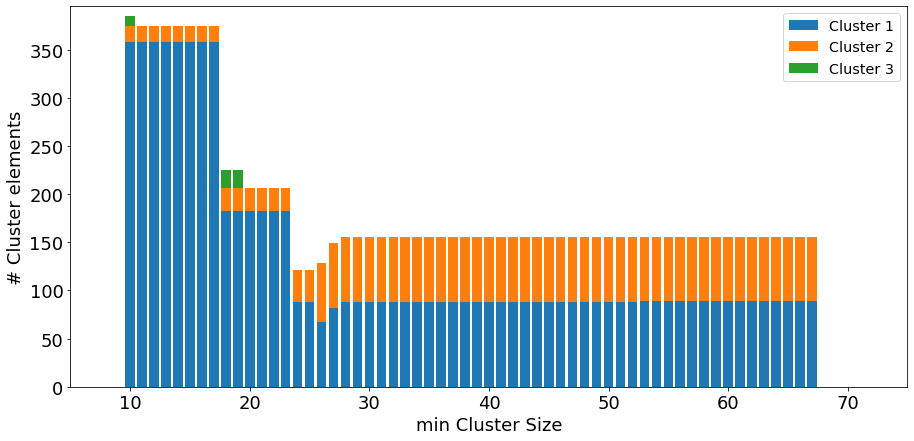

PDF saved as: test_hdb_minsamp_1_prob_0.8.pdf


In [11]:
# Run HDBSCAN through a range of min samples ===========
if step_4:
#     data_clustering.run_multi_hdbscan(verbose = True, show_plot = False, probability = 80, min_samples = 1)
    data_clustering.run_multi_hdbscan(verbose = True, show_plot = False)
    data_clustering.plot_multi_hdbscan_stats(fig_nm = 'default')

Insert min_Cluster_size: 20
mCls = 20; clusters = 2; N_members = [183, 23]


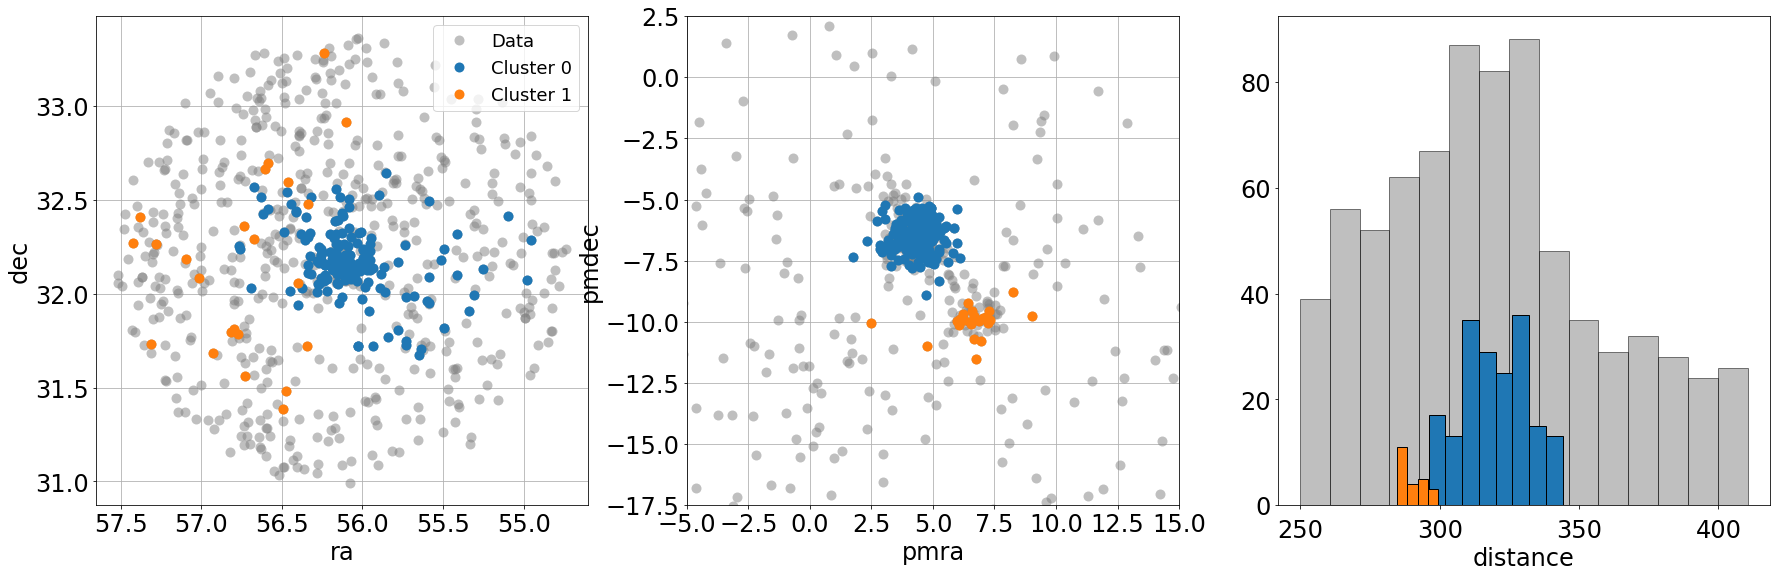

hipsURL http://cdn.skies.esac.esa.int/AllWISEColor/
imgFormat jpeg
hipsURL http://cdn.skies.esac.esa.int/AllWISEColor/
imgFormat jpeg


In [12]:
# Show selected HDBSCAN results ========================
if step_4:
    data_clustering.run_hdbscan(probability = data_clustering.probability, min_samples=data_clustering.min_samples, verbose = True)
    data_clustering.plot_hdbscan_clusters(xlim_1=[-5,15], ylim_1 = [-17.5,2.5])
    if step_2:
        data_clustering.esasky_hdbscan_clusters(esasky, radius = sample_gaia.ADQL_pars['radius'].value)

# Compare to Control

Comparing HDBSCAN clusters to Control Sample:
Cluster 0 contains   183 Elements,                     including 121 (82.3%) of the Control Sample
Cluster 1 contains    23 Elements,                     including 0 ( 0.0%) of the Control Sample



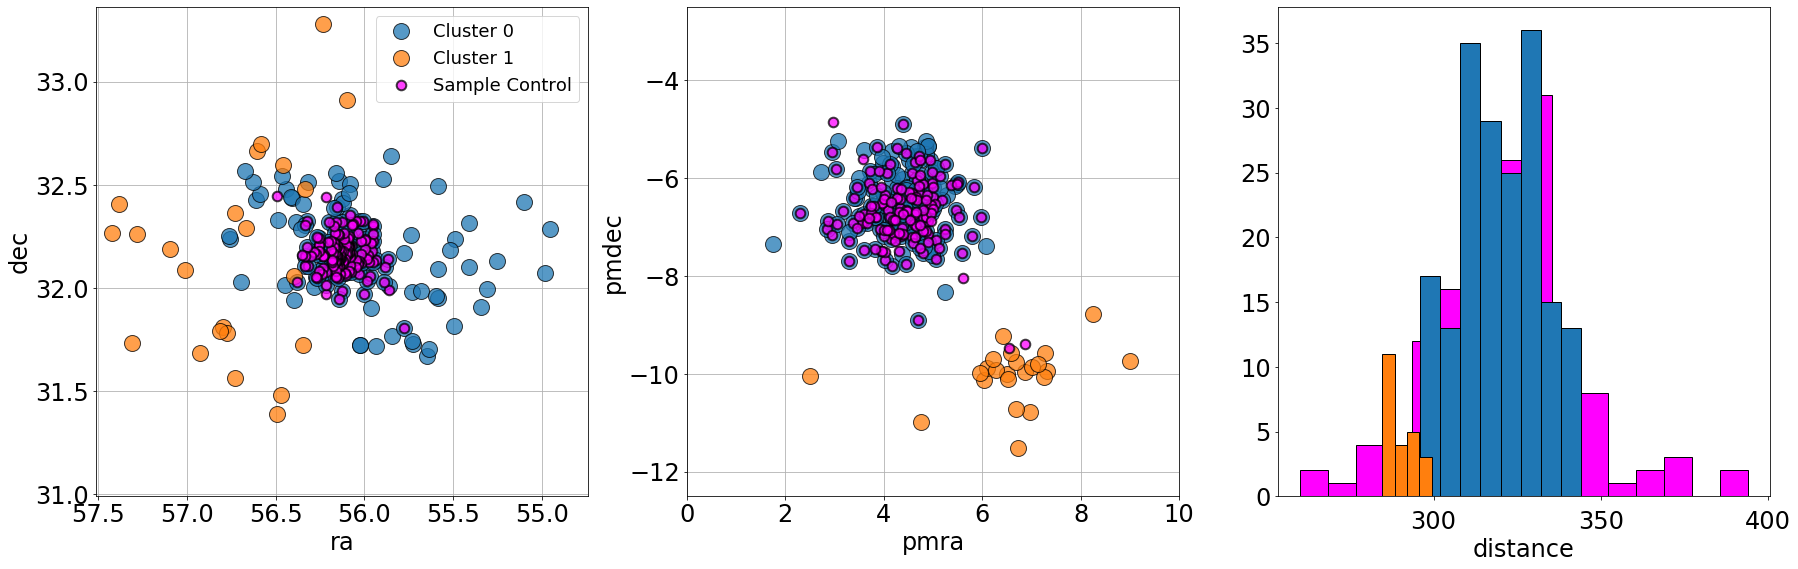

PDF saved as: test_hdb_minsamp_1_prob_0.8_.pdf


In [13]:
# Cluster Comparison ===================================
if step_1:
    comp = Compare()
    comp.read_control(control, mew = 2)
    comp.read_clusters(data_clustering, verbose = False)
    comp.compare_to_control(verbose = True)
    print()
    
    # Plot Comparison ======================================
    # Define plot XY ranges for panels 1 & 2
    xlim_1 = [sample_gaia.cat['ra'].min(),  sample_gaia.cat['ra'].max()]
    ylim_1 = [sample_gaia.cat['dec'].min(), sample_gaia.cat['dec'].max()]
    xlim_2 = [0.0, 10.0]
    ylim_2 = [-12.5, -2.5]

    comp.plot_clusters_comp(markersize = 16, xlim_1 = xlim_1, ylim_1 = ylim_1, xlim_2 = xlim_2, ylim_2 = ylim_2, fig_nm = 'default')

# Save HDBSCAN slected Output

In [14]:
if step_4:
    data_clustering.save_cluster()

Select cluster index to save: 0
HDBSCAN Cluster data saved as: test_minsamp_1_mCls_20_cl_0.vot
